<a href="https://colab.research.google.com/github/az2611/berkeley_ML/blob/main/Module_5_prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [285]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [286]:
df = pd.read_csv('/content/drive/My Drive/UC_Berkeley_Certificate/Module_05/data/coupons.csv', sep = '\t')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [287]:
data = pd.read_csv('/content/drive/My Drive/UC_Berkeley_Certificate/Module_05/data/coupons.csv')
#data = pd.read_csv('data/coupons.csv', sep = '\t')

In [288]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [290]:
data_nulls=data.isnull().sum()
print(data_nulls)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [291]:
#Decided to drop all rows with missing data, except for 'car'
data_cl = data.dropna(subset = ['Bar', 'CoffeeHouse', 'CarryAway','RestaurantLessThan20','Restaurant20To50'])

#Decided to drop the "car" column due to relevance and amount of missing values
data_cl = data_cl.drop('car',axis=1)

data_nulls=data_cl.isnull().sum()
data_nulls

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [292]:
data_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

4. What proportion of the total observations chose to accept the coupon? 



In [293]:
accept_pct=data_cl['Y'].value_counts(normalize = True)
accept_pct

1    0.569335
0    0.430665
Name: Y, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

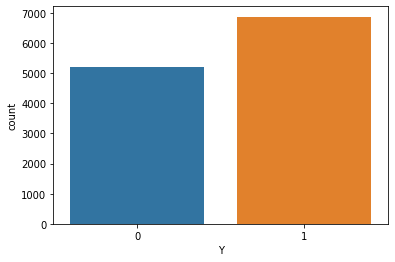

In [294]:
sns.countplot(data=data_cl, x='Y')
plt.savefig('/content/drive/My Drive/UC_Berkeley_Certificate/Module_05/figs/01_coupon_column.png')

6. Use a histogram to visualize the temperature column.

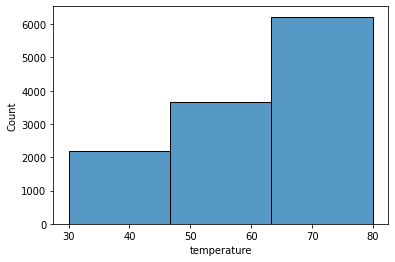

In [295]:
sns.histplot(data=data_cl, x='temperature',bins=3)
plt.savefig('/content/drive/My Drive/UC_Berkeley_Certificate/Module_05/figs/02_temperature_column.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [296]:
data_bar = data_cl[data_cl['coupon'] == 'Bar']
data_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [297]:
accept_pct=data_bar['Y'].value_counts(normalize = True)
accept_pct

0    0.588082
1    0.411918
Name: Y, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [298]:
#Acceptance rate for those less than 3 times
visits = ['never','less1','1~3']
data_bar_less3 = data_bar[data_bar['Bar'].isin(visits)]
data_bar_less3.groupby(['Y']).count().transform(lambda x: x / x.sum())[['Bar']].reset_index()

,Y,Bar
0,0,0.627326
1,1,0.372674


In [299]:
#Acceptance rate for those more than 3 times
visits = ['4~8','gt8']
data_bar_more3 = data_bar[data_bar['Bar'].isin(visits)]
data_bar_more3.groupby(['Y']).count().transform(lambda x: x / x.sum())[['Bar']].reset_index()

,Y,Bar
0,0,0.238342
1,1,0.761658


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [300]:
ages = ['26','31','36','50plus','41','46']
visits = ['1~3', 'gt8', '4~8']
data_bar.query("age in @ages and  Bar in @visits").groupby(['Y']).count().transform(lambda x: x / x.sum())[['Bar']].reset_index()

,Y,Bar
0,0,0.310174
1,1,0.689826


In [301]:
ages = ['26','31','36','50plus','41','46']
visits = ['never','less1']
data_bar.query("age in @ages and  Bar in @visits").groupby(['Y']).count().transform(lambda x: x / x.sum())[['Bar']].reset_index()

,Y,Bar
0,0,0.732558
1,1,0.267442


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [302]:
visits = ['1~3', '4~8', 'gt8']
data_bar.query("Bar in @visits and passanger != 'Kid(s)' and occupation !='Farming Fishing & Forestry'").groupby(['Y']).count().transform(lambda x: x / x.sum())[['Bar']].reset_index()

,Y,Bar
0,0,0.290566
1,1,0.709434


In [303]:
visits = ['never','less1']
data_bar.query("Bar in @visits and passanger != 'Kid(s)' and occupation !='Farming Fishing & Forestry'").groupby(['Y']).count().transform(lambda x: x / x.sum())[['Bar']].reset_index()

,Y,Bar
0,0,0.688081
1,1,0.311919


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [304]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed 
data_bar.query("Bar != ['never','less1'] and passanger != 'Kid(s)' and maritalStatus !='widowed'").groupby(['Y']).count().transform(lambda x: x / x.sum())[['Bar']].reset_index()

,Y,Bar
0,0,0.290566
1,1,0.709434


In [305]:
#go to bars more than once a month and are under the age of 30
ages = ['below21','21','26']
data_bar.query("Bar != ['never','less1'] and age in @ages").groupby(['Y']).count().transform(lambda x: x / x.sum())[['Bar']].reset_index()

,Y,Bar
0,0,0.280488
1,1,0.719512


In [306]:
#go to cheap restaurants more than 4 times a month and income is less than 50K. 
restaurants = ['4~8','gt8']
income = ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']
data_bar.query("RestaurantLessThan20 in @restaurants and income in @income").groupby(['Y']).count().transform(lambda x: x / x.sum())[['RestaurantLessThan20']].reset_index()

,Y,RestaurantLessThan20
0,0,0.543544
1,1,0.456456


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [307]:
# Rows with Null values in 'Bar', 'CoffeeHouse', 'CarryAway','RestaurantLessThan20','Restaurant20To50' were eliminated from the dataset
# Rows with Null values in 'car' remained in order to keep integrity in the dataset 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Investigating Coffee House Coupons

In [308]:
data_cl.groupby(['coupon']).count().transform(lambda x: x / x.sum())[['Y']].reset_index().sort_values('Y', ascending=False).head()

,coupon,Y
2,Coffee House,0.315920
4,Restaurant(<20),0.219637
1,Carry out & Take away,0.188757
0,Bar,0.158374
3,Restaurant(20-50),0.117311


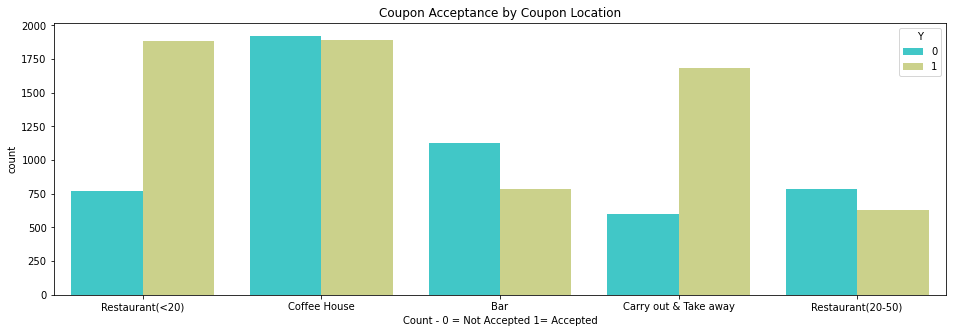

In [309]:
plt.figure(figsize = (16,5))
sns.countplot(data=data_cl, x="coupon", hue="Y", palette="rainbow").set(title='Coupon Acceptance by Coupon Location', xlabel='Count - 0 = Not Accepted 1= Accepted')
plt.savefig('/content/drive/My Drive/UC_Berkeley_Certificate/Module_05/figs/03_Coupon_Acceptance_by_Coupon_Location.png')

#Coffe House coupons is the most preavalent 

## 1. Create a new `DataFrame` that contains just the Coffee House coupons.

In [310]:
#Reduce the data to Coffee House coupons
data_coffee = data_cl[data_cl['coupon'] == 'Coffee House']
data_coffee.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


## 2. What proportion of Coffee House coupons were accepted?

In [311]:
#Accepted Coupons
accept_pct_coffee=data_coffee['Y'].value_counts(normalize = True)
accept_pct_coffee

#49.6% of people of people who received 'Coffee House' coupons accepted them.

0    0.503669
1    0.496331
Name: Y, dtype: float64

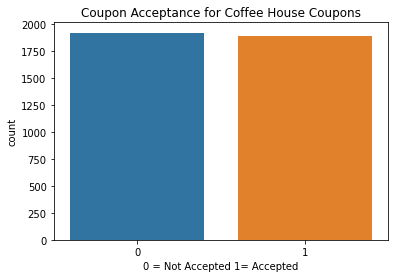

In [312]:
sns.countplot(data=data_coffee, x='Y').set(title='Coupon Acceptance for Coffee House Coupons', xlabel='0 = Not Accepted 1= Accepted' )
plt.savefig('/content/drive/My Drive/UC_Berkeley_Certificate/Module_05/figs/04_Coupon_Acceptance_for_Coffee_House_Coupons.png')

## 3. Age distribution for those receiving Coffee House coupons

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


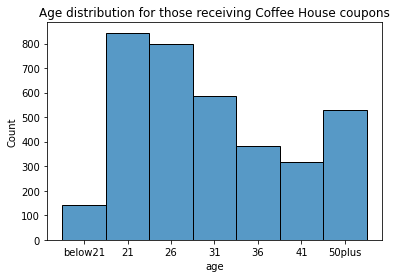

In [313]:
# Rearrange levels in "age"
data_coffee["age"] = data_coffee["age"].astype('category')
data_coffee["age"] = data_coffee["age"].cat.set_categories(["below21", "21", "26", "31", "36", "41", "50plus"], ordered=True)

sns.histplot(data=data_coffee, x='age').set(title='Age distribution for those receiving Coffee House coupons')
plt.savefig('/content/drive/My Drive/UC_Berkeley_Certificate/Module_05/figs/05_Age_distribution_for_those_receiving_Coffee_House_coupons.png')

#People between 21 and 31 make the bulk of those who received coupon for Coffee House

## 4. Proportion of accepted Coffee Shop coupons by age?

In [314]:
data_coffee.query('Y==1').groupby(['age']).count().transform(lambda x: x / x.sum())[['destination']].reset_index().sort_values('destination', ascending=False).head(10)

#People between 21 and 31 comprise 63% of those who accepted a Coffee House coupon.

,age,destination
1,21,0.244955
2,26,0.229260
3,31,0.159193
6,50plus,0.124439
4,36,0.100336
5,41,0.087444
0,below21,0.054372


## 4.1 Coffee House Coupon Acceptance by Age

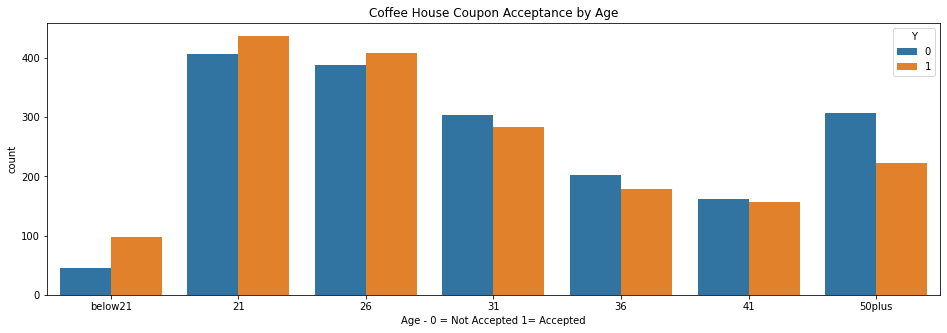

In [315]:
plt.figure(figsize = (16,5))
sns.countplot(data=data_coffee, x='age', hue='Y').set(title='Coffee House Coupon Acceptance by Age', xlabel='Age - 0 = Not Accepted 1= Accepted' )
plt.savefig('/content/drive/My Drive/UC_Berkeley_Certificate/Module_05/figs/06_Coupon_Acceptance_by_Age.png')

In [316]:
data_coffee.groupby(['age','Y']).count().transform(lambda x: x / x.sum())[['destination']]

#The ratio between coupon accepted and not accepted is quite balanced and similar for all ages.

destination
age     Y             
below21 0     0.012781
        1     0.026952
21      0     0.113087
        1     0.121423
26      0     0.107808
        1     0.113643
31      0     0.084190
        1     0.078911
36      0     0.056405
        1     0.049736
41      0     0.044735
        1     0.043345
50plus  0     0.085301
        1     0.061684

## 5. What proportion of Coffee House Coupons were accepted by marital status.

In [317]:
data_coffee.query('Y==1').groupby(['maritalStatus']).count().transform(lambda x: x / x.sum())[['destination']].reset_index().sort_values('destination', ascending=False).head(10)

#Single people and married partner account for 78.6% of those who accepted coupon for Coffee House.

,maritalStatus,destination
2,Single,0.406547
1,Married partner,0.380148
3,Unmarried partner,0.167899
0,Divorced,0.039071
4,Widowed,0.006336


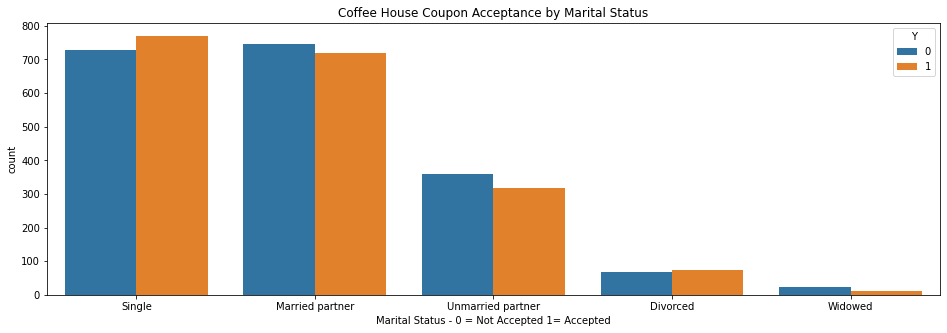

In [318]:
plt.figure(figsize = (16,5))
sns.countplot(data=data_coffee, x='maritalStatus', hue='Y').set(title='Coffee House Coupon Acceptance by Marital Status', xlabel='Marital Status - 0 = Not Accepted 1= Accepted' )
plt.savefig('/content/drive/My Drive/UC_Berkeley_Certificate/Module_05/figs/07_CH_Coupon_Acceptance_by_Marital_Status.png')

## 6. What proportion of Coffee House Coupons were accepted by age and marital status.

In [319]:
data_coffee.query("Y==1").groupby(['age','maritalStatus']).count().transform(lambda x: x / x.sum())[['destination']].reset_index().sort_values('destination', ascending=False).head()

#Single people between 21 and 26 amount for 25.5%  of those who accepted a Coffee House coupon followed by people with Married Partner between 26 and 31, which comprise 16% of all those who accepted a Coffee House Coupon.

,age,maritalStatus,destination
7,21,Single,0.146861
12,26,Single,0.108184
16,31,Married partner,0.089126
11,26,Married partner,0.074552
31,50plus,Married partner,0.061099


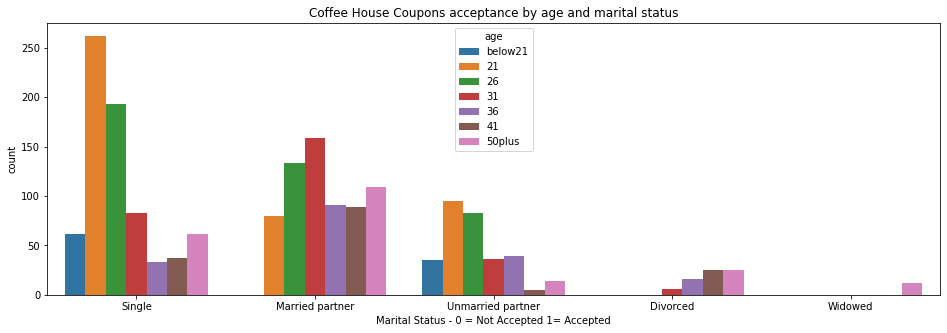

In [320]:
plt.figure(figsize = (16,5))
sns.countplot(data=data_coffee.query("Y==1"), x='maritalStatus', hue='age').set(title='Coffee House Coupons acceptance by age and marital status', xlabel='Marital Status - 0 = Not Accepted 1= Accepted' )

plt.savefig('/content/drive/My Drive/UC_Berkeley_Certificate/Module_05/figs/08_CH_Coupon_acceptance_by_age_and_marital_status.png')

## 7. What proportion of coffee house were accepted by income

In [321]:
data_coffee["income"] = data_coffee["income"].astype('category')
data_coffee["income"] = data_coffee["income"].cat.set_categories(["Less than $12500",
"$12500 - $24999",
"$25000 - $37499",
"$37500 - $49999",
"$50000 - $62499",
"$62500 - $74999",
"$75000 - $87499",
"$87500 - $99999",
"$100000 or More"], ordered=True)

i=data_coffee.query("Y==1").groupby(['income']).count().transform(lambda x: x / x.sum())[['Y']].reset_index().sort_values('Y', ascending=False)
i

#People making between $12,500 and $49,999 comprise 47.8% of all accepted coupons for a coffee house

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,income,Y
1,$12500 - $24999,0.164731
3,$37500 - $49999,0.161563
2,$25000 - $37499,0.151531
8,$100000 or More,0.135692
4,$50000 - $62499,0.134636
0,Less than $12500,0.085005
7,$87500 - $99999,0.068638
5,$62500 - $74999,0.062302
6,$75000 - $87499,0.035903


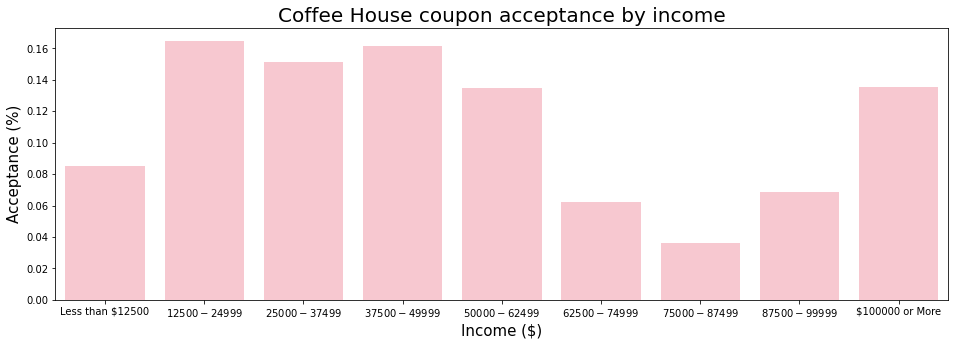

In [322]:
plt.figure(figsize = (16,5))
sns.barplot(data=i, x="income", y="Y", color='pink')
plt.title("Coffee House coupon acceptance by income", fontsize = 20)
plt.xlabel("Income ($)", fontsize = 15)
plt.ylabel("Acceptance (%)", fontsize = 15)

plt.savefig('/content/drive/My Drive/UC_Berkeley_Certificate/Module_05/figs/09_CH_Coupon_acceptance_by_income.png')

## 8. Coupon acceptance by age, marital status and income

In [323]:
data_coffee.query('Y==1').groupby(['maritalStatus','age']).count().transform(lambda x: x / x.sum())[['CoffeeHouse']].reset_index().sort_values('CoffeeHouse', ascending=False).head(10)

# Single people and people with married partner, between 21 and 31 make 42% of people who accepted coupon for Coffee House

,maritalStatus,age,CoffeeHouse
15,Single,21,0.146861
16,Single,26,0.108184
10,Married partner,31,0.089126
9,Married partner,26,0.074552
13,Married partner,50plus,0.061099
22,Unmarried partner,21,0.053251
11,Married partner,36,0.051009
12,Married partner,41,0.049888
23,Unmarried partner,26,0.046525
17,Single,31,0.046525


## 9. Analyzing Single People in their 20's for Coffeee House Coupons


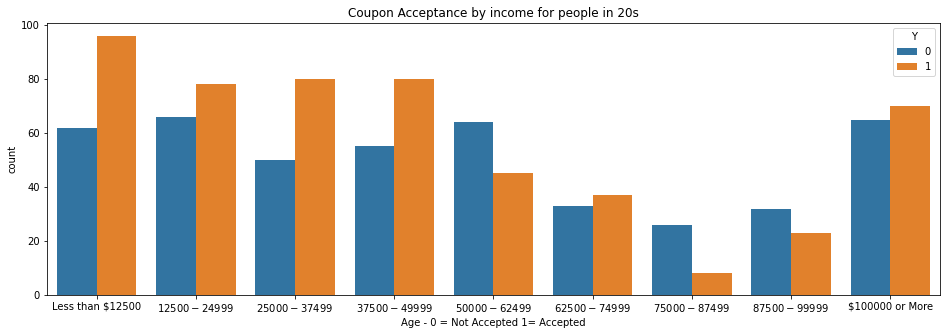

In [324]:
data_20 = data_coffee.query('age==["below21","21","26"] and maritalStatus=="Single"')

plt.figure(figsize = (16,5))
sns.countplot(data=data_20, x='income', hue='Y').set(title='Coupon Acceptance by income for people in 20s', xlabel='Age - 0 = Not Accepted 1= Accepted' )
plt.savefig('/content/drive/My Drive/UC_Berkeley_Certificate/Module_05/figs/10_CH_Coupon_Acceptance_by_income_for_people_in_20s.png')

#People in their 20's with income less than $50,000 have much haigher propencity to accept the coupon for c

## 10. People in their 20s who accepted the coupon

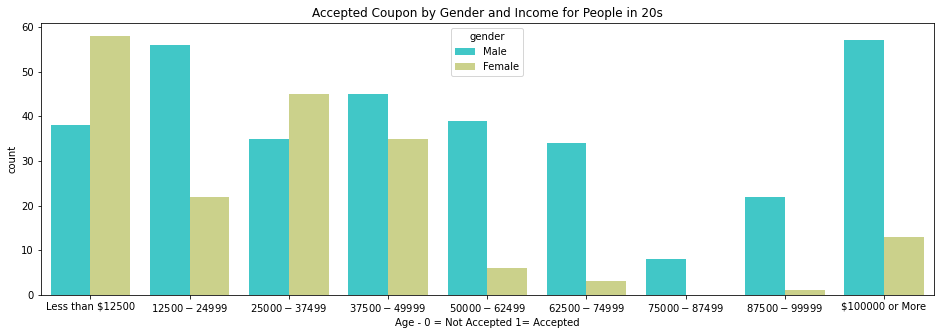

In [283]:
data_20 = data_coffee.query('Y==1 and age==["below21","21","26"] and maritalStatus=="Single"')

plt.figure(figsize = (16,5))
sns.countplot(data=data_20, x='income', hue='gender', palette="rainbow").set(title='Accepted Coupon by Gender and Income for People in 20s', xlabel='Age - 0 = Not Accepted 1= Accepted' )
plt.savefig('/content/drive/My Drive/UC_Berkeley_Certificate/Module_05/figs/11_CH_Accepted_Coupon_by_Gender_and_Income_for_People_in_20s.png')

# In general, man in their 20's have a much higher tendency to accept the coupon for Coffee House than women.

## 10. People in their 20s who accepted the coupon

In [325]:
data_20.groupby(['income','gender']).count().transform(lambda x: x / x.sum())[['destination']].reset_index().sort_values('destination', ascending=False).head()

#Women in their 20s making less than $12,500 and men maing more than $100,000 represent the majority of consumers who accepted and used a Coffee House coupon.

,income,gender,destination
0,Less than $12500,Female,0.097938
17,$100000 or More,Male,0.096907
3,$12500 - $24999,Male,0.092784
9,$50000 - $62499,Male,0.091753
7,$37500 - $49999,Male,0.084536
